# Parte 1

1. Genere un conjunto de datos utilizando la función make_classification de sklearn.

X, y = make_classification(n_samples=100,

                            n_features=2,

                            n_informative=2,

                            n_redundant=0,

                            n_classes=2,

                            random_state=0)

 

2. Usamos dos características para que podamos visualizar nuestros datos. Haz un diagrama de dispersión con la primera característica en el eje horizontal y la segunda en el eje vertical. Representa las dos categorías usando diferentes colores o diferentes símbolos.

 

3. Con solo echar un vistazo, haga una estimación para un límite de decisión de la forma x_2 = m*x_1 + b. (Tenga en cuenta que aún no hemos ajustado una regresión logística a esto, pero si lo hiciéramos, la línea de constante p = 0.5 tiene m = -beta_1 / beta_2 y b = -beta_0 / beta_2).

## Parte 2

Para poder evaluar si nuestro algoritmo de descenso de gradiente está funcionando correctamente, necesitaremos poder calcular el costo.

Recuerde la función logarítmica de verosimilitud para la regresión logística. Nuestro objetivo es maximizar este valor.

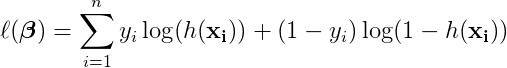

Recuerde que la función de hipótesis h se define de la siguiente manera:

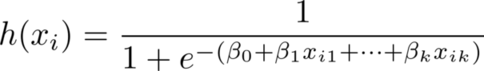

Dado que implementaremos Gradient Descent, que minimiza una función, veremos la función de costo a continuación, que es solo la negación de la función de probabilidad logarítmica anterior.

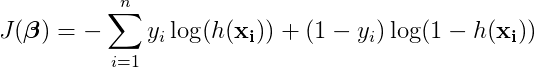

El gradiente de la función de costo es el siguiente:

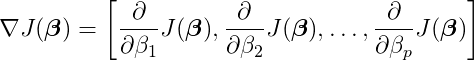

Cada derivada parcial se calculará de la siguiente manera (para j >= 1):

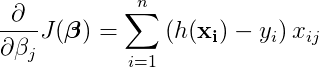

 

1. Para verificar que sus implementaciones sean correctas, calcule lo siguiente.
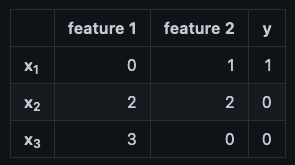



i. Usando los datos anteriores, calcule el valor de la función de costo. Inicializa tus coeficientes: β1 =1, β2 =1. Por ahora, suponga que β0=0 (es decir, no estamos considerando un término de intersección).

    Sugerencia: utilizará (β1x1,1 + β2x1,2) mientras calcula su función de hipótesis para el primer punto de datos.

ii. Usando los datos anteriores, calcule el gradiente de la función de costo.

 

2. En logistic_regression_functions.py, implemente las funciones predict_proba y predict. predict_proba estas calcularan el resultado de h(x) para los coeficientes dados. Esto devuelve valores flotantes entre 0 y 1, que deben interpretarse como probabilidades condicionales. predict redondeará estos valores para que obtenga una predicción de 0 o 1. Se proporciona un argumento opcional para el umbral, cuyo valor predeterminado es 0,5. Nota: Los nombres de estas funciones se eligieron para alinearse con las convenciones de sklearn.

3. En logistic_regression_functions.py, implemente el costo y el gradiente. Debería poder usar la función predict_proba que implementó anteriormente. Asegúrese de verificar que obtiene los mismos valores que calculó anteriormente.

En una terminal, debería poder ejecutar su función de esta manera:

In [26]:
import logistic_regression_functions as f
import numpy as np
X = np.array([[0, 1], [2, 2], [3, 0]])
y = np.array([1, 0, 0])
coeffs = np.array([1, 1])
cost_function(X, y, coeffs)

#Parte 3
#Ahora vamos a implementar el gradiente descendente, un algoritmo para resolver problemas de optimización.

(0.9799283541848895,
 array([[1.21843096, 1.63668965, 1.58762354],
        [0.39772525, 0.64868046, 0.61924079]]))

A continuación se muestra el pseudocódigo para el algoritmo de descenso de gradiente. Este es un algoritmo genérico que puede resolver muchos problemas de optimización convexa (de los cuales la regresión logística es un ejemplo). En nuestro caso, el β que estamos resolviendo es el vector de coeficientes en la regresión logística.

En este pseudocódigo, y en nuestra implementación, nos detendremos después de un número determinado de iteraciones. Un enfoque más común es detenerse una vez que la mejora incremental en la función de optimización sea lo suficientemente pequeña, y terminar después de un número fijo de iteraciones para no crear un ciclo infinito si las cosas salen mal durante la optimización.

Gradient Descent:
    input: J: función diferencial (función de optimización)
           α: tasa de aprendizaje
           k: numberero de iteraciones
    output: maximo local de la función de optimización J      

    inicializar β (all 0's)
    repetir para k iteraciones:
        β <- β - α * gradient(J)


Vas a completar el código auxiliar en GradientDescent.py.

1. Comience echando un vistazo al código de inicio. Observe cómo se inicializa el objeto GradientDescent. Se necesita una función de costo y una función de gradiente. Le pasaremos las funciones que escribimos arriba. Aquí hay un código de ejemplo de cómo podremos ejecutar el código de Gradient Descent una vez que haya completado todas las funciones.

In [32]:
import logistic_regression_functions
from GradientDescent import GradientDescent

gd = GradientDescent(cost_function, gradient, predict, predict_proba)
gd.fit(X, y)
print("coeffs:", gd.coeffs) 
predictions = gd.predict(X)

TypeError: fit() missing 1 required positional argument: 'coeffs'

2. Implementar el método de ajuste. Siga el pseudocódigo de arriba.

3. Implemente el método de predicción. Simplemente, debería llamar a la función predict_func que se tomó como parámetro.

In [16]:
import pandas as pd 
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go
from logistic_regression_functions import predict_proba, predict, cost_function, gradient
from GradientDescent import GradientDescent
import matplotlib.pyplot as plt

In [17]:
X, y = make_classification(n_samples=100,n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=0)

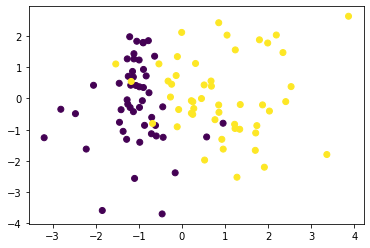

In [18]:
plt.scatter(X[:,0], X[:,1],c=y)

plt.show();

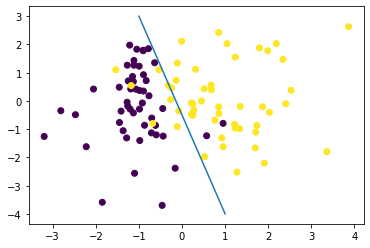

In [19]:
plt.scatter(X[:,0], X[:,1],c=y)

plt.plot([1,-1],[-4,3])

plt.show();

In [22]:
fig = px.scatter(x=X.T[0], y=X.T[1], color=y)

m = -3
b = -1

x_1 = np.arange(-2, 3)
x_2 = m*x_1 + b

fig.add_trace(go.Scatter(x=x_1, y= x_2))

In [6]:
coeffs_inicial = np.zeros((X.shape[1], 1))

In [7]:
predictions = predict_proba(X, coeffs_inicial)

In [8]:
cost, grad = cost_function(X, y, coeffs_inicial)

cost, grad

(0.693147180559946,
 array([[-0.49261388],
        [-0.05521399]]))

In [9]:
model = GradientDescent(cost, grad, predict)

In [10]:
history = model.fit(X, y, coeffs_inicial)

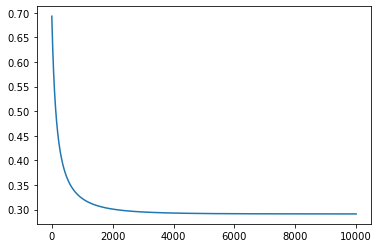

In [11]:
plt.plot(history)

In [12]:
good_coeff = model.get_coeffs()

In [23]:
fig = px.scatter(x=X.T[0], y=X.T[1], color=y)

m = good_coeff[0]
b = good_coeff[1]

x_1 = np.arange(-2, 3)
x_2 = m*x_1 + b

fig.add_trace(go.Scatter(x=x_1, y= x_2))